In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [28]:
def cdfplot(name, logs=False, VL=0, FS=18, RTDIV=1.0, sigma=1.0, B=0, W=100):
    title = "Representative CDF Curves"
    if name == "gcb":
        iteration, runtime , totalmemory,compmemory = np.loadtxt('gcb.txt', delimiter=':', unpack=True)
        data= [t/1000 for t in runtime]
        data = data[B:W]
        title = "Erlang GCBench 56m"
    elif name == "fib":
        iteration, runtime , totalmemory,compmemory = np.loadtxt('complex.txt', delimiter=':', unpack=True)
        data=[t/1000 for t in runtime]
        data = data[B:W]
        title = "Erlang Fibonacci"
    
    def gen_cdf(data):
        num_bins = 20
        counts, bin_edges = np.histogram(data, bins=num_bins, normed=True)
        cdf = np.cumsum(counts)    
        sorted_data = np.sort(data)
        sorted_data /= RTDIV
        yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)
        xmin = min(sorted_data)
        xmax = max(sorted_data)
        return sorted_data, yvals, xmin, xmax
    
    sorted_data, yvals, xmin, xmax = gen_cdf(data)

    fig, ax1 = plt.subplots(dpi=120, figsize=(7,7))
    ax1.set_xlabel(r"Run Time ($ms$)", fontsize=FS)
    ax1.set_ylabel(r"Probability", fontsize=FS)

    if logs: plt.xscale('log')
    #print xmin, xmax, yvals
    ax1.plot(sorted_data, yvals,  'r-')
    ax1.set_title(title, fontsize=FS)

    if VL and len(VL):
        for vl in VL:
            plt.plot([xmin, xmax], [vl, vl], ls='--', color='black')
    
    if name == "idealized":
        sorted_data2, yvals2, xmin2, xmax2 = gen_cdf(data2)
        sorted_data3, yvals3, xmin3, xmax3 = gen_cdf(data3)
        plt.plot(sorted_data2,yvals2, 'b-')#, sorted_data,yvals,'bs' )
        plt.plot(sorted_data3,yvals3, 'g-')#, sorted_data,yvals,'bs' )


    pp = PdfPages("cdf-{}.pdf".format(name))
    pp.savefig(fig)
    pp.close()

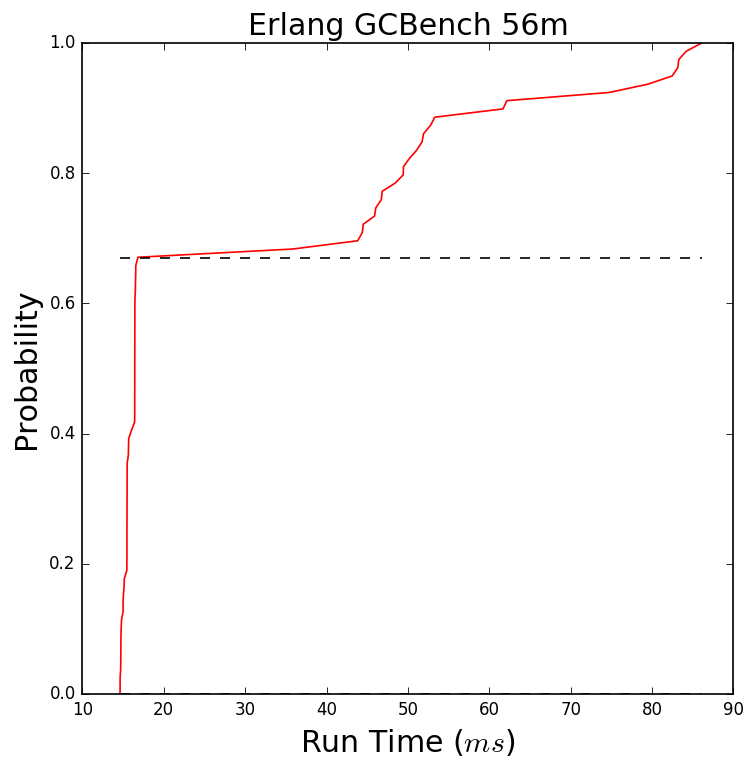

In [29]:
cdfplot("gcb", VL=[0, .67], B=20, W=100)


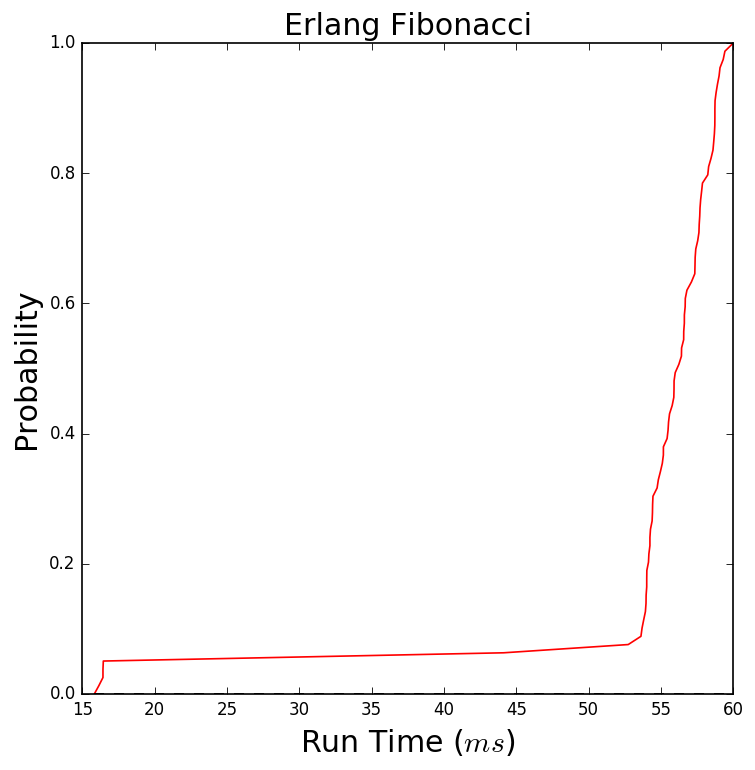

In [30]:
cdfplot("fib", VL=[0,0], B=20, W=100)
